In [153]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets


iris = datasets.load_iris()
print(iris.data[0:1,:]) # show first line of matrix
print(len(iris.data),len(iris.target))
print(iris.target_names)
print(iris.target)

[[5.1 3.5 1.4 0.2]]
150 150
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [154]:
import numpy as np


def activation_function(x):
    if x < 0:
        return -1
    else:
        return 1

In [155]:
def perceptron(inp, weights):
    # This is the same as the dot product np.dot(i, w)
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

In [156]:
def predict(inp_vec, weights):
    class_label = perceptron(inp_vec, weights)
    return class_label

In [157]:
class_labels = np.copy(iris.target); print('class_labels:',class_labels[40:60])
print('iris.data:',iris.data[40:60]) # each item contains 4 values
class_labels[class_labels != 0] = -1
class_labels[class_labels == 0] = 1
#class_labels[class_labels == -1] = 0

trainings_data = [(d[2:4], l) for d, l in zip(iris.data, class_labels)] # get only first 2 values from data
trainings_data

class_labels: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
iris.data: [[5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]]


[(array([1.4, 0.2]), 1),
 (array([1.4, 0.2]), 1),
 (array([1.3, 0.2]), 1),
 (array([1.5, 0.2]), 1),
 (array([1.4, 0.2]), 1),
 (array([1.7, 0.4]), 1),
 (array([1.4, 0.3]), 1),
 (array([1.5, 0.2]), 1),
 (array([1.4, 0.2]), 1),
 (array([1.5, 0.1]), 1),
 (array([1.5, 0.2]), 1),
 (array([1.6, 0.2]), 1),
 (array([1.4, 0.1]), 1),
 (array([1.1, 0.1]), 1),
 (array([1.2, 0.2]), 1),
 (array([1.5, 0.4]), 1),
 (array([1.3, 0.4]), 1),
 (array([1.4, 0.3]), 1),
 (array([1.7, 0.3]), 1),
 (array([1.5, 0.3]), 1),
 (array([1.7, 0.2]), 1),
 (array([1.5, 0.4]), 1),
 (array([1. , 0.2]), 1),
 (array([1.7, 0.5]), 1),
 (array([1.9, 0.2]), 1),
 (array([1.6, 0.2]), 1),
 (array([1.6, 0.4]), 1),
 (array([1.5, 0.2]), 1),
 (array([1.4, 0.2]), 1),
 (array([1.6, 0.2]), 1),
 (array([1.6, 0.2]), 1),
 (array([1.5, 0.4]), 1),
 (array([1.5, 0.1]), 1),
 (array([1.4, 0.2]), 1),
 (array([1.5, 0.2]), 1),
 (array([1.2, 0.2]), 1),
 (array([1.3, 0.2]), 1),
 (array([1.4, 0.1]), 1),
 (array([1.3, 0.2]), 1),
 (array([1.5, 0.2]), 1),


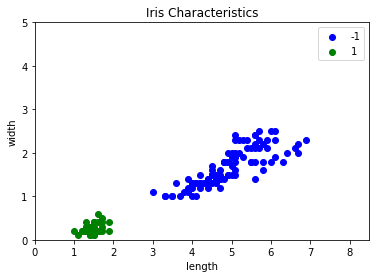

In [158]:
from itertools import cycle


def plot_data(data, w_line=None):
    # print(data[:10])
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)

    colors = cycle('bgrcmy')
    for l, col in zip(np.unique(class_labels), colors):
        d =  data_points[class_labels == l]
        x = d[:,0]
        y = d[:,1]
        plt.scatter(d[:,0], d[:,1], c=col, label=l)
    
    if w_line: # only plot a division line if one exists
        l = np.linspace(0, 8.5) # 50 evenly spaced numbers for the x axis
        m, b = w_line
        plt.plot(l, m * l + b, 'y-', lw=2)

    plt.axis([0, 8.5, 0, 5])
    plt.title('Iris Characteristics')
    plt.xlabel('length')
    plt.ylabel('width')
    plt.legend()
plot_data(trainings_data)

In [159]:
import numpy as np


def pla(training_data, no_iterations=10000, eta=0.5):
    dim = len(training_data[0][0])
    weights =  np.random.random(dim) # error and weights start out as random numbers
    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]

    for i in range(no_iterations):
        # get a predictor set and label for each iteration (start over when training data is exhausted)
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights)
        error = expected_label - perceptron_output
        # print(error)
        weights += eta * error * inp_vec # accumulate the weights
        weight_history.append(np.copy(weights))
        
    return weights, weight_history 
        

learned_weights, weight_history = pla(trainings_data)
# print(weight_history)
print(learned_weights)

[  3.14603179 -18.64813122]


weights: [  3.14603179 -18.64813122]  norm  18.91164493307471
ww [ 0.16635421 -0.98606606]
ww1 [-0.9860660607143009, -0.16635421217204105]
ww2 [0.9860660607143009, 0.16635421217204105]
slope: 0.16870493651463367 bias 0.16635421217204105
(0.16870493651463367, 0.16635421217204105)
weights: [  3.14603179 -18.64813122]  norm  18.91164493307471
ww [ 0.16635421 -0.98606606]
ww1 [-0.9860660607143009, -0.16635421217204105]
ww2 [0.9860660607143009, 0.16635421217204105]
slope: 0.16870493651463367 bias 0.16635421217204105


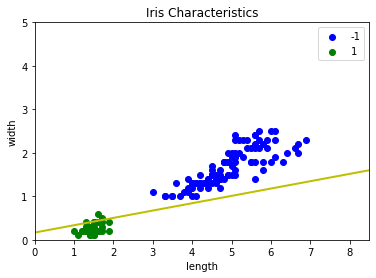

In [160]:

def compute_line(weights):
    norm = np.linalg.norm(weights) # calculating the frobenius norm (or L2 norm) of the learned weights (in order to make them comparable to other vectors)
    print('weights:',weights,' norm ',norm)
    ww = weights / norm 
    print('ww',ww)
    ww1 = [ww[1], -ww[0]]
    print('ww1',ww1)
    ww2 = [-ww[1] , ww[0]]
    print('ww2',ww2)
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0])
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]
    print('slope:',m,'bias',b)
    return m, b


print(compute_line(learned_weights))
plot_data(trainings_data, compute_line(learned_weights))

In [161]:
def pla(training_data, no_iterations=50000, w_bias=False, eta=0.5):
    error = np.random.random()
    dim = len(training_data[0][0])
    weights = np.random.random(dim)
    weight_history = [np.copy(weights)]

    if w_bias:
        weights = np.random.random(dim + 1) # an extra bias weight is added to the list of weights
        data = np.array(list(zip(*training_data))[0]) # extract the data from the targets
        # print(data)
        # print(data.shape) # shape is (150,2)
        biases = np.ones((data.shape[0], 1)) # matrix of 150 rows by 1 column of values = 1
        training_data_w_bias = np.append(data, biases, axis=1) # append the biases to the data creating extra column
        print(training_data_w_bias)
        training_data = list(zip(training_data_w_bias, 
                                 list(zip(*training_data))[1]))
    
    for i in range(no_iterations):
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights)
        error = expected_label - perceptron_output

        weights += eta * error * inp_vec
        weight_history.append(np.copy(weights))

    return weights, np.array(weight_history)

# trainings_data is iris_data[:2] (first 2 columns) zipped with target data
learned_weights, weight_history = pla(trainings_data, w_bias=True)
learned_weights = learned_weights[2:4]
print(learned_weights)


plot_data(trainings_data, compute_line(learned_weights))

[[1.4 0.2 1. ]
 [1.4 0.2 1. ]
 [1.3 0.2 1. ]
 [1.5 0.2 1. ]
 [1.4 0.2 1. ]
 [1.7 0.4 1. ]
 [1.4 0.3 1. ]
 [1.5 0.2 1. ]
 [1.4 0.2 1. ]
 [1.5 0.1 1. ]
 [1.5 0.2 1. ]
 [1.6 0.2 1. ]
 [1.4 0.1 1. ]
 [1.1 0.1 1. ]
 [1.2 0.2 1. ]
 [1.5 0.4 1. ]
 [1.3 0.4 1. ]
 [1.4 0.3 1. ]
 [1.7 0.3 1. ]
 [1.5 0.3 1. ]
 [1.7 0.2 1. ]
 [1.5 0.4 1. ]
 [1.  0.2 1. ]
 [1.7 0.5 1. ]
 [1.9 0.2 1. ]
 [1.6 0.2 1. ]
 [1.6 0.4 1. ]
 [1.5 0.2 1. ]
 [1.4 0.2 1. ]
 [1.6 0.2 1. ]
 [1.6 0.2 1. ]
 [1.5 0.4 1. ]
 [1.5 0.1 1. ]
 [1.4 0.2 1. ]
 [1.5 0.2 1. ]
 [1.2 0.2 1. ]
 [1.3 0.2 1. ]
 [1.4 0.1 1. ]
 [1.3 0.2 1. ]
 [1.5 0.2 1. ]
 [1.3 0.3 1. ]
 [1.3 0.3 1. ]
 [1.3 0.2 1. ]
 [1.6 0.6 1. ]
 [1.9 0.4 1. ]
 [1.4 0.3 1. ]
 [1.6 0.2 1. ]
 [1.4 0.2 1. ]
 [1.5 0.2 1. ]
 [1.4 0.2 1. ]
 [4.7 1.4 1. ]
 [4.5 1.5 1. ]
 [4.9 1.5 1. ]
 [4.  1.3 1. ]
 [4.6 1.5 1. ]
 [4.5 1.3 1. ]
 [4.7 1.6 1. ]
 [3.3 1.  1. ]
 [4.6 1.3 1. ]
 [3.9 1.4 1. ]
 [3.5 1.  1. ]
 [4.2 1.5 1. ]
 [4.  1.  1. ]
 [4.7 1.4 1. ]
 [3.6 1.3 1. ]
 [4.4 1.4 1. ]
 [4.5 1.5 

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
def compute_error_rate(data, model):   
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)
    
    errors = np.array([predict(vec, model) for vec in data_points])
    c_falsy_elements = np.sum(errors != class_labels)
    return c_falsy_elements / len(class_labels)


# Calculate error rates for each weight in the weight history
error_rates = [compute_error_rate(trainings_data, i) for i in weight_history]

plt.plot(error_rates)
plt.show()